<b>IDS_GROUP059 | 2019_Cluster-DSE-IDS_A1_PS1 </b>
----------------------------------------
<b>Problem Statement:</b>
    
A big online retailer company “Amazing Zone” sells various products through their portal. One of the important feature of this business model is that the retailer takes responsibility of the shipment of the product. As the retailer takes guarantee that the purchased product will be delivered within promised timeline.

Currently the local distribution centers located in cities uses the static kind of scheduling technique to determine the delivery route for every delivery boy. That means, every morning the computer program prepares a delivery schedule for each delivery person which needs to be followed for completing the deliveries on the time. Many times, due to the traffic conditions on the roads, the delivery boys finds its challenging to complete the required number of deliveries which results into the delays in the whole process. To improve upon this behavior, the company is thinking of dynamic routing of the delivery personnel’s. That means, when they are on the roads, and if there are certain incident has happened on that route, then the boy will be informed about the same and also an updated route will be provided for him to follow. 

We need to take a closer look at the records of behavior of the urban traffic of the city of Sao Paulo and <br>
a)	Identify the factors causing the traffic congestion <br>
b)	Suggest model that can help to improve upon the delivery schedule <br>

<b>Feature Description</b><br>

IndIndependent Features:

id 						                -  Numeric and Unique<br>
Hour									-  Descrete       	<br>
Immobilized_bus							-  Descrete     	<br>
Broken_Truck							-  Descrete     	<br>
Vehicle_excess							-  Descrete     	<br>
Accident_victim							-  Descrete     	<br>
Running_over							-  Descrete     	<br>
Fire_vehicles							-  Descrete     	<br>
Occurrence_involving_freight			-  Descrete     	<br>
Incident_involving_dangerous_freight	-  Descrete     	<br>
Lack_of_electricity						-  Descrete     	<br>
Fire									-  Descrete     	<br>
Point_of_flooding						-  Descrete     	<br>
Manifestations							-  Descrete     	<br>
Defect_in_the_network_of_trolleybuses	-  Descrete     	<br>
Tree_on_the_road						-  Descrete     	<br>
Semaphore_off							-  Descrete     	<br>
Intermittent_Semaphore					-  Descrete  		<br>

Target Variable:<br>

Slowness_in_traffic_percent				-  Continuous    

In [1]:
#importing necessary packages
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


<b>Importing data</b> from the provided arff file.<br>
Using the custom code below to read the arff file and create a csv out of it.<br>
Further we read this csv into a dataframe and continue with our processing<br>

In [2]:
file = open('data.arff', 'r')
cpfile = open('data.csv', 'w')  
header = ""
lines=[]
i = 0
j = 0 
for line in file:
    Identifier = line.split(' ')
   
    if(Identifier[0]=='@attribute') :
        if(len(header)>=1):
            header = header + "," + str(Identifier[1]) 
        else:
            header = str(Identifier[1])
           
    elif(line.strip()=='@data'):
        j = i
        header = header.replace("'","")
        cpfile.write(header+"\n")
        lines.append(header+"\n")
        number = len(header.split(','))
        #print(number)
    else:
       
        if(i>j and len(line)>1):
            lines.append(line)
            number = len(line.split(','))
            
            if(number>25):
                print("diff-",Identifier[0]," i",i," number",number)
           
            cpfile.write(line)        
    i+=1    
file.close()
cpfile.close()

In [3]:
df = pd.read_csv("data.csv",na_values=' ')
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


No of feature :17
Target variable: Slowness in traffic (%)


In [4]:
# Trying to describe the data and see various attributes

print("Reviewing data......",df.head())

print("\n\n\nShape of data...",df.shape)

print("\n\n\nDescribing different numeric attributes...",df.describe().T)

print("\n\n\nUnderstanding different attributes types...\n\n")
print(df.info())

Reviewing data......    Hour  Immobilized_bus  Broken_Truck Vehicle_excess  Accident_victim  \
0  7:00              0.0           0.0              T              0.0   
1  7:30              0.0           0.0              F              0.0   
2  8:00              0.0           0.0              F              0.0   
3  8:30              0.0           0.0              F              0.0   
4  9:00              0.0           0.0              F              0.0   

  Running_over Fire_vehicles  Occurrence_involving_freight  \
0          0.0            NO                           0.0   
1          0.0            NO                           0.0   
2          0.0            NO                           0.0   
3          0.0            NO                           0.0   
4          0.0            NO                           0.0   

   Incident_involving_dangerous_freight  Lack_of_electricity  Fire  \
0                                   0.0                  0.0   0.0   
1                    

<b>Feature Processing / Cleaning using Data Visualizations:</b>

In [5]:
#check for null values in data
df.isnull().sum()

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          2
Running_over                             0
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     2
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           0
Defect_in_the_network_of_trolleybuses    2
Tree_on_the_road                         0
Semaphore_off                            1
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
dtype: int64

#### Null Handling 
This shows that attributes 'Accident_victim', 'Incident_involving_dangerous_freight', 'Defect_in_the_network_of_trolleybuses', 'Semaphore_off' have few missing values    

Filling null values with mode - the appropriate measure for these kind of attributes

In [6]:
df['Accident_victim'].fillna(df['Accident_victim'].mode()[0], inplace=True)
df['Incident_involving_dangerous_freight'].fillna(df['Incident_involving_dangerous_freight'].mode()[0], inplace=True)
df['Defect_in_the_network_of_trolleybuses'].fillna(df['Defect_in_the_network_of_trolleybuses'].mode()[0], inplace=True)
df['Semaphore_off'].fillna(df['Semaphore_off'].mode()[0], inplace=True)

###### Hours column handling

In [7]:
# Method to map hours attribute value to some category
def hourCategory(va11):
    val = str(va11)
    #val = val.lstrip("b'").rstrip("''")
    time = val.split(":")
    hour =  int(time[0])
    if(hour < 12):
        return "Morning"
    elif (hour < 16):
        return "Afternoon"
    elif (hour < 22):
        return "Evening"
    elif (hour < 6):
        return "Night"

In [8]:
#Convert Hours feature to category
df['Hour'] = df['Hour'].apply(hourCategory)

#### EDA - Data Distrubution (Feature wise spread) and Outlier Analysis

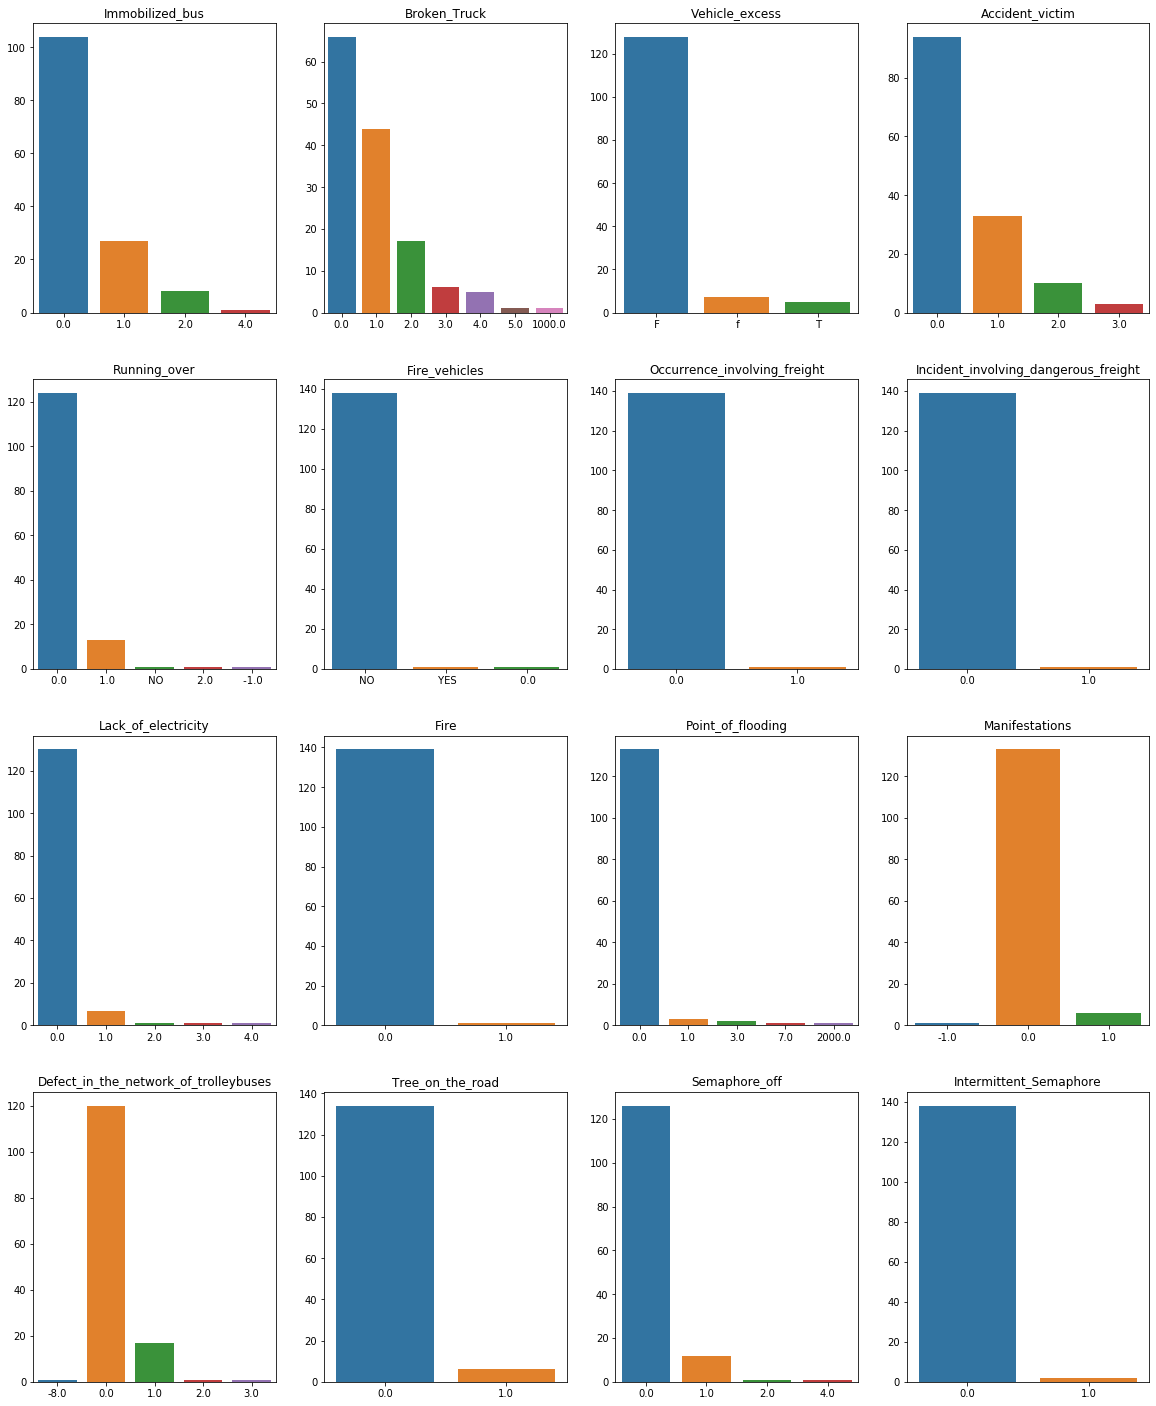

In [9]:
"""Plotting all the attributes to get a visualization of the 
   intra-column data  spread
   
   This should give us an idea of the data distribution and outlier if any
"""
#data.columns[1:]
graphRow, graphCol = 0, 0
catch,dims = plt.subplots(4, 4, figsize = (20, 25))
plt.subplots_adjust(hspace = .23)

for att in df.columns[1:]:
    if att not in ['Hour','Slowness_in_traffic_percent']:
        bar_data = df[att].value_counts()
        sns.barplot(bar_data.index, bar_data.values, ax = dims[graphRow,graphCol])
        dims[graphRow, graphCol].set_title(att)
    graphCol += 1 
    if graphCol ==4:
        graphRow += 1
        graphCol = 0

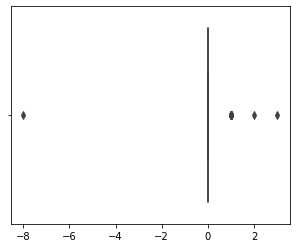

In [10]:
""" Boxplot to visualize the distribution of numeric data
    This should help us understand the outliers"""
fig = plt.figure(figsize=(5,4))
sns.boxplot([x for x in df['Defect_in_the_network_of_trolleybuses'].dropna()])
#plt.show()


##### Data Clean up from Data visualizations above

Some observations listed and corrected.<br><br>
a.We notice that Manifestations has got one negetaive value record.<br>
b.Defect_in_the_network_of_trolleybuses has got one negetaive value record.<br>
c.Point_of_flooding and Broken_Truck features has got outlier values.<br>
d.Vehicle_excess which is a T/F column has got a lowercase f.<br>
e.Fire_vehicles which is a Yes/No column has got a numeric 0.0 value <br>
f.Running over has got unwanted No and negetive values <br>

In [11]:
#Outlier Processing

#Manifestations processing 
df['Manifestations']=df['Manifestations'].replace([-1],df['Manifestations'].mode()[0])

#Defect_in_the_network_of_trolleybuses processing
df['Defect_in_the_network_of_trolleybuses']=df['Defect_in_the_network_of_trolleybuses'].replace([-8],df['Defect_in_the_network_of_trolleybuses'].mode()[0])

#Point_of_flooding processing 
df['Point_of_flooding']=df['Point_of_flooding'].replace([2000],df['Point_of_flooding'].mode()[0])

#Broken_Truck processing 
df['Broken_Truck']=df['Broken_Truck'].replace([1000],df['Broken_Truck'].mode()[0])


In [12]:
#Improper Data Hadling
#Vehicle_excess processing

df['Vehicle_excess'].unique()

array([' T', ' F', ' f'], dtype=object)

In [13]:
df['Vehicle_excess']=df['Vehicle_excess'].replace([' f'],' F')
df['Vehicle_excess']=df['Vehicle_excess'].str.strip()
df.Vehicle_excess=[1 if each=="T" else 0 for each in df.Vehicle_excess]
df['Vehicle_excess'].unique()

array([1, 0])

In [14]:
#Fire_vehicles processing

df['Fire_vehicles'].unique()

array([' NO', ' 0.0', ' YES'], dtype=object)

In [15]:
df['Fire_vehicles']=df['Fire_vehicles'].replace([' 0.0'],' NO')
df['Fire_vehicles']=df['Fire_vehicles'].str.strip()
df.Fire_vehicles=[1 if each=="YES" else 0 for each in df.Fire_vehicles]
df['Fire_vehicles'].unique()

array([0, 1])

In [16]:
#Running_over processing

df['Running_over'].unique()

array([' 0.0', ' NO', ' 1.0', ' 2.0', ' -1.0'], dtype=object)

In [17]:
df['Running_over']=df['Running_over'].replace([' NO',' -1.0'],' 0.0')
df['Running_over']=df['Running_over'].str.strip()
df['Running_over'].unique()

array(['0.0', '1.0', '2.0'], dtype=object)

In [18]:
df['Accident_victim'].unique()

array([0., 1., 2., 3.])

In [19]:
df['Incident_involving_dangerous_freight'].unique()

array([0., 1.])

In [20]:
df['Defect_in_the_network_of_trolleybuses'].unique() 

array([0., 1., 3., 2.])

In [21]:
df['Semaphore_off'].unique()

array([0., 1., 2., 4.])

In [22]:
df['Point_of_flooding'].unique()

array([0., 1., 3., 7.])

In [23]:
for col in df.columns: 
    if col not in ['Hour']:
        df[col]=pd.to_numeric(df[col])

In [24]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,Morning,0.0,0.0,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,Morning,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,Morning,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,Morning,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,Morning,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [25]:
# Creating a dummy variable for the variable 'Hours' and dropping the first one.

Hour_dummies = pd.get_dummies(df['Hour'],prefix='Hour',drop_first=False)
#Adding the results to the master dataframe
df = pd.concat([df,Hour_dummies],axis=1)
df = df.drop(['Hour'],axis=1)

In [26]:
for col in df.columns: 
    df[col]=pd.to_numeric(df[col])

#### Feature Importance Visually - On what features Target variable is dependent ?

Lets plot a stacked bar graph to visualize how each feature is impacting the target variable.<br>
We create bins out of the continuous target variable "Slowness_in_traffic_percent" and plot
each feature to see which is contributing to higher traffic.

Fist we bin the "Slowness_in_traffic_percent" to three categories {low,medium,high} and analyze and
then we bin it to two categories {low,high} and visualize

In [27]:
#Categorizing traffic slowness percent using bins for visualization

bins = [0, 8, 16, 24]
names = ['low', 'med', 'high']
df['slowPercent'] = pd.cut(df['Slowness_in_traffic_percent'], bins, labels=names)

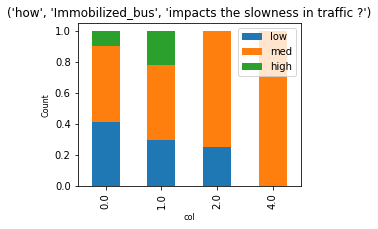

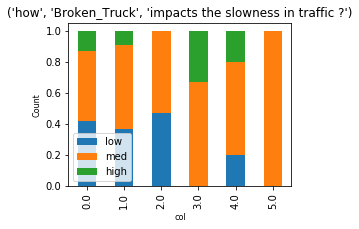

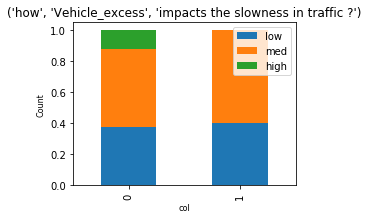

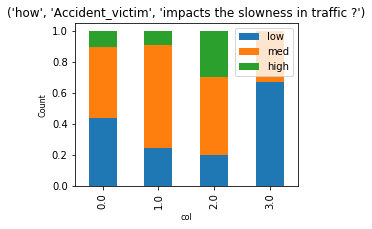

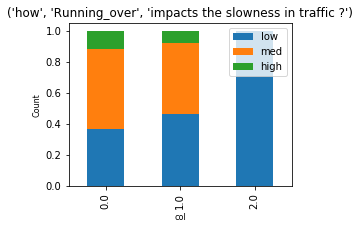

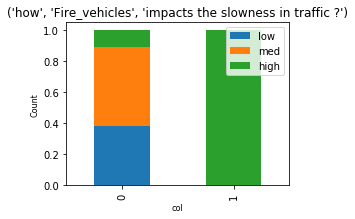

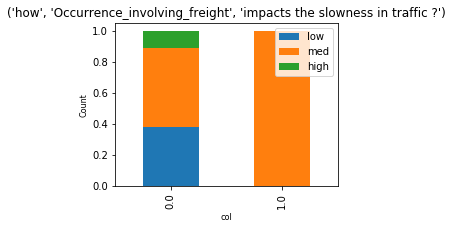

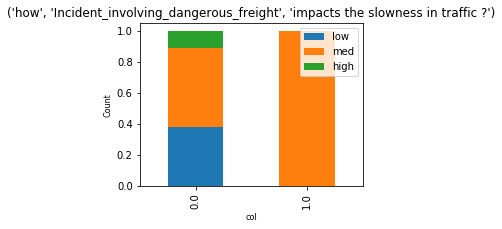

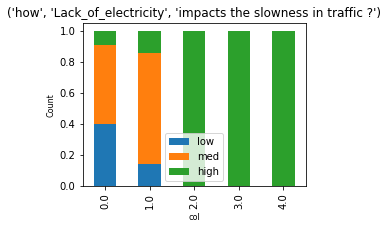

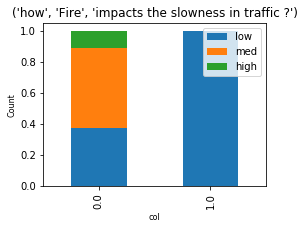

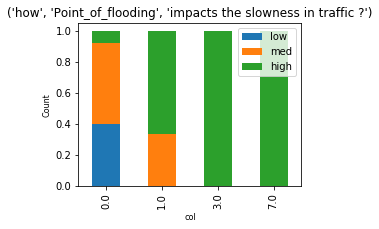

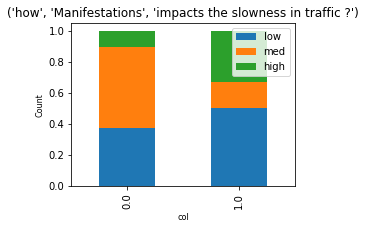

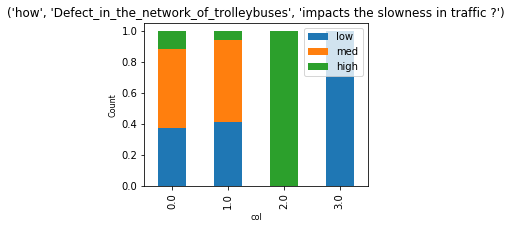

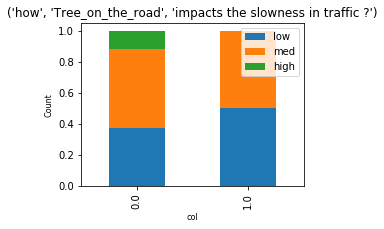

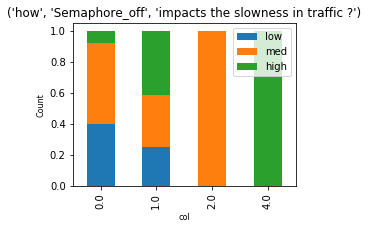

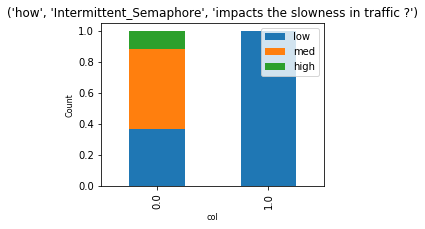

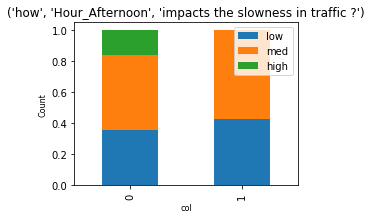

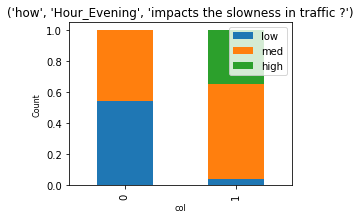

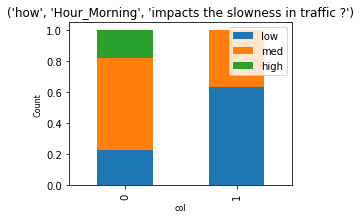

In [28]:
for col in df.columns: 
    #how different columns impacts the slowness in traffic
    if col not in ['Slowness_in_traffic_percent','slowPercent']:
        var = pd.crosstab(df[col], df['slowPercent'])
        var.div(var.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4, 3))
        title = 'how',col,'impacts the slowness in traffic ?'
        plt.title(title, fontsize = 12)
        plt.xlabel('col', fontsize = 8)
        plt.ylabel('Count', fontsize = 8)
        plt.legend()
        plt.show()

In [29]:
df=df.drop(['slowPercent'],axis=1)

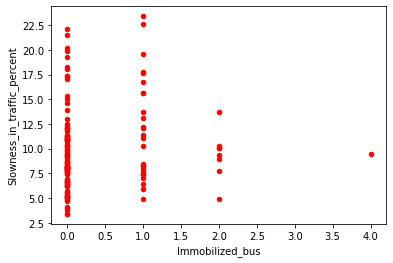

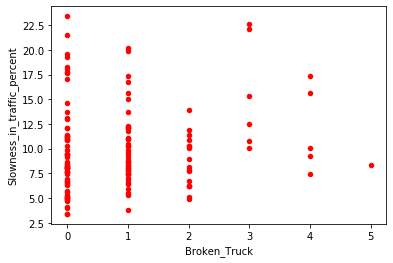

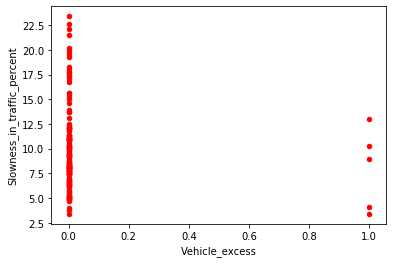

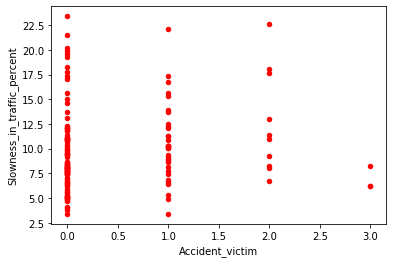

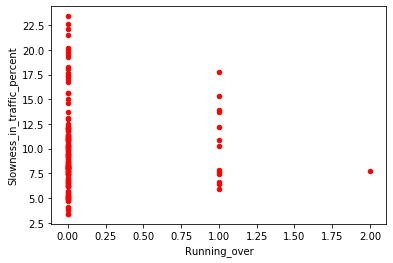

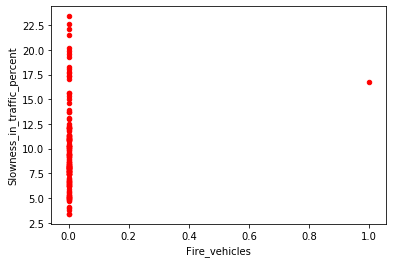

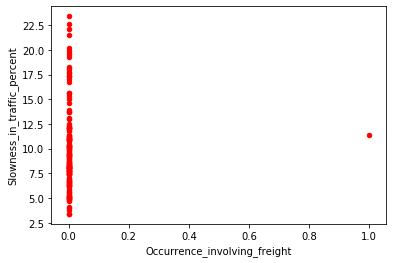

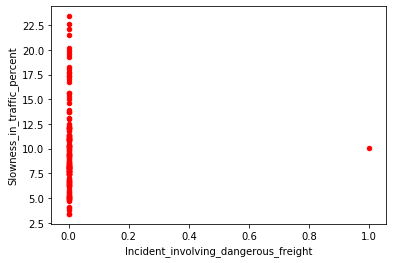

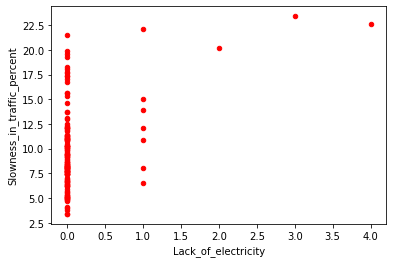

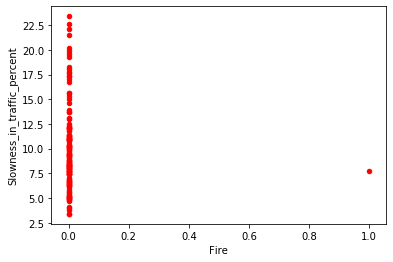

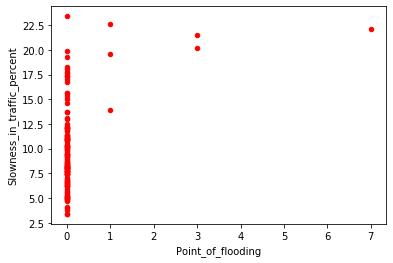

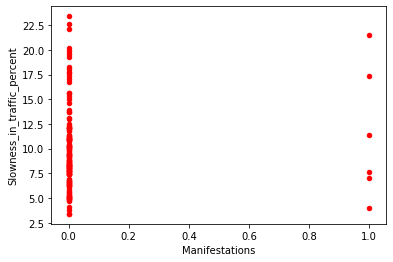

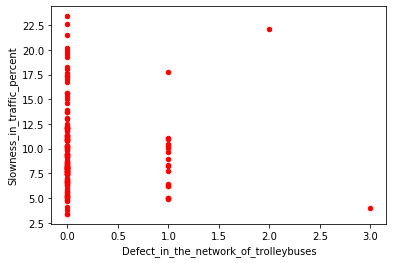

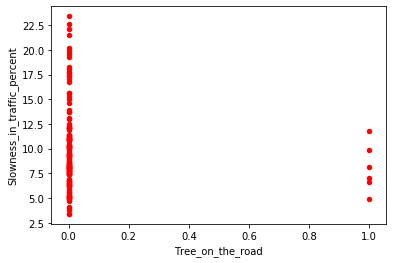

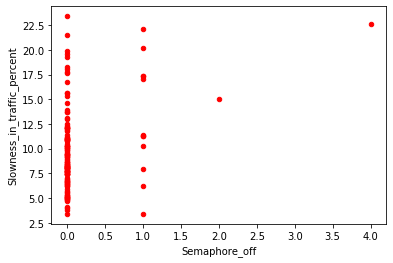

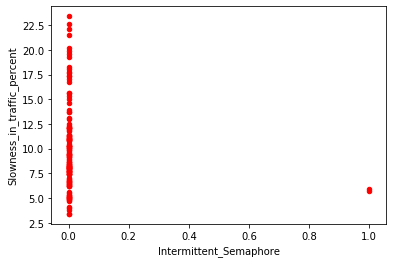

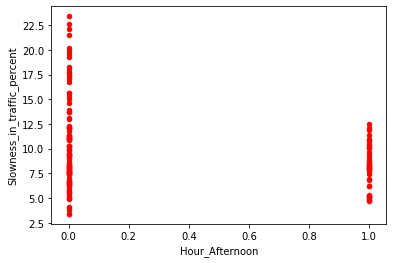

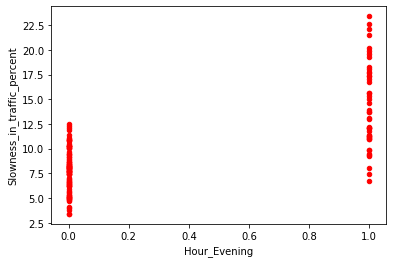

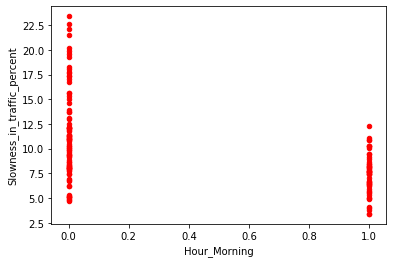

In [30]:
# Lets plot a scatter graph for each variable against the target variable to get an understanding 
# if they are really making a difference

for col in df.columns: 
    #how different columns impacts the slowness in traffic
    if col not in ['Slowness_in_traffic_percent','slowPercent','slowPercent2']:
        df.plot(kind='scatter',x=col,y='Slowness_in_traffic_percent',color='red')
        plt.show()

#### Note:

From the visualizations (Stacked bar and Scatter plots) above we can clearly see that the below features 
are impacting the target variable "Slowness_in_traffic_percent" the most. <br>
<br>
a)Hour_Evening<br>
b)Immobilized_bus<br>
c)Broken_Truck<br>
d)Accident_victim<br>
e)Semaphore_off<br>
f)Point_of_flooding

Similarly the below features are having min impact on the target

a)Vehicle_excess<br>
b)Fire_vehicles<br>
c)Fire<br>
d)Incident_involving_dangerous_freight<br>
e)Occurrence_involving_freight

In [31]:
#Lets drop insignificant features

df = df.drop(['Vehicle_excess'],axis=1)
df = df.drop(['Fire_vehicles'],axis=1)
df = df.drop(['Fire'],axis=1)
df = df.drop(['Incident_involving_dangerous_freight'],axis=1)
df = df.drop(['Occurrence_involving_freight'],axis=1)

#### Data Scaling:
Lets perform scaling on the features for normalized data and better convergance

In [32]:
#Function to perform scalling across all attributes and insert scaled columns
# Subsequently remove the original column as that is no longer required
from sklearn.preprocessing import StandardScaler

def performScaling(dfTemp, columnName):
    # Create a minimum and maximum processor object
    standardScalerX = StandardScaler()
    # Create x, where x the 'scores' column's values as floats
    var_forScale = dfTemp[[columnName]].values.astype(float)
    # Create an object to transform the data to fit minmax processor
    var_scaled = standardScalerX.fit_transform(var_forScale)
    # Run the normalizer on the dataframe
    dfTemp = dfTemp.drop([columnName],axis=1)    
    dfTemp.insert(loc=len(dfTemp.columns),column=columnName,value=pd.DataFrame(var_scaled))
    return dfTemp

In [33]:
#Perform scaling on all attributes except the Hours and Target variable
#df=df.drop(['slowPercent'],axis=1)
    
for col in df.columns: 
    if(col != 'Hour' ):#and col != 'Slowness_in_traffic_percent'):
    #if(col != 'Hour'):
        df = performScaling(df,col)

A few more <b>Data Visualization</b> to get an insight about different features and their relation

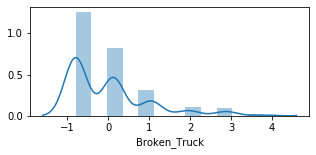

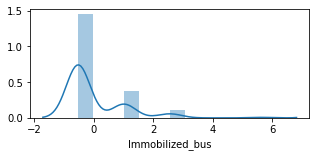

In [34]:
plt.figure(figsize=(5,2))
plt.tight_layout()
sns.distplot(df['Broken_Truck'],bins=12)
#sns.distplot(df['Semaphore_off'])

plt.figure(figsize=(5,2))
plt.tight_layout()
sns.distplot(df['Immobilized_bus'],bins=12)
#sns.distplot(df['Semaphore_off'])

Now Lets try a <b>Regression Plotting</b> for most contributing attributes

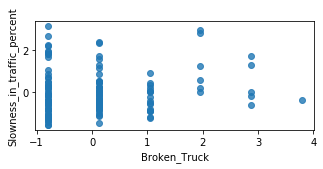

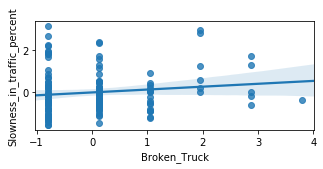

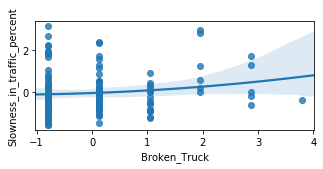

In [35]:
#Broken_Truck
plt.figure(figsize=(5,2))
# A regular scatter plot
sns.regplot(x=df["Broken_Truck"], y=df["Slowness_in_traffic_percent"], fit_reg=False)
plt.show()

plt.figure(figsize=(5,2))
# A scatter plot with a linear regression fit:
sns.regplot(x=df["Broken_Truck"], y=df["Slowness_in_traffic_percent"], fit_reg=True)
plt.show()

plt.figure(figsize=(5,2))
# A scatter plot with a polynomial regression fit:
sns.regplot(x=df["Broken_Truck"], y=df["Slowness_in_traffic_percent"], fit_reg=True, order=2)
plt.show()

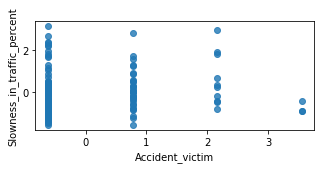

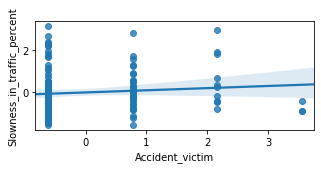

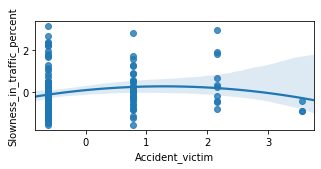

In [36]:
#Accident_victim
plt.figure(figsize=(5,2))
# A regular scatter plot
sns.regplot(x=df["Accident_victim"], y=df["Slowness_in_traffic_percent"], fit_reg=False)
plt.show()

plt.figure(figsize=(5,2))
# A scatter plot with a linear regression fit:
sns.regplot(x=df["Accident_victim"], y=df["Slowness_in_traffic_percent"], fit_reg=True)
plt.show()

plt.figure(figsize=(5,2))
# A scatter plot with a polynomial regression fit:
sns.regplot(x=df["Accident_victim"], y=df["Slowness_in_traffic_percent"], fit_reg=True, order=2)
plt.show()

<b>Correlation:</b>Let's understand the correlation among different attributes:

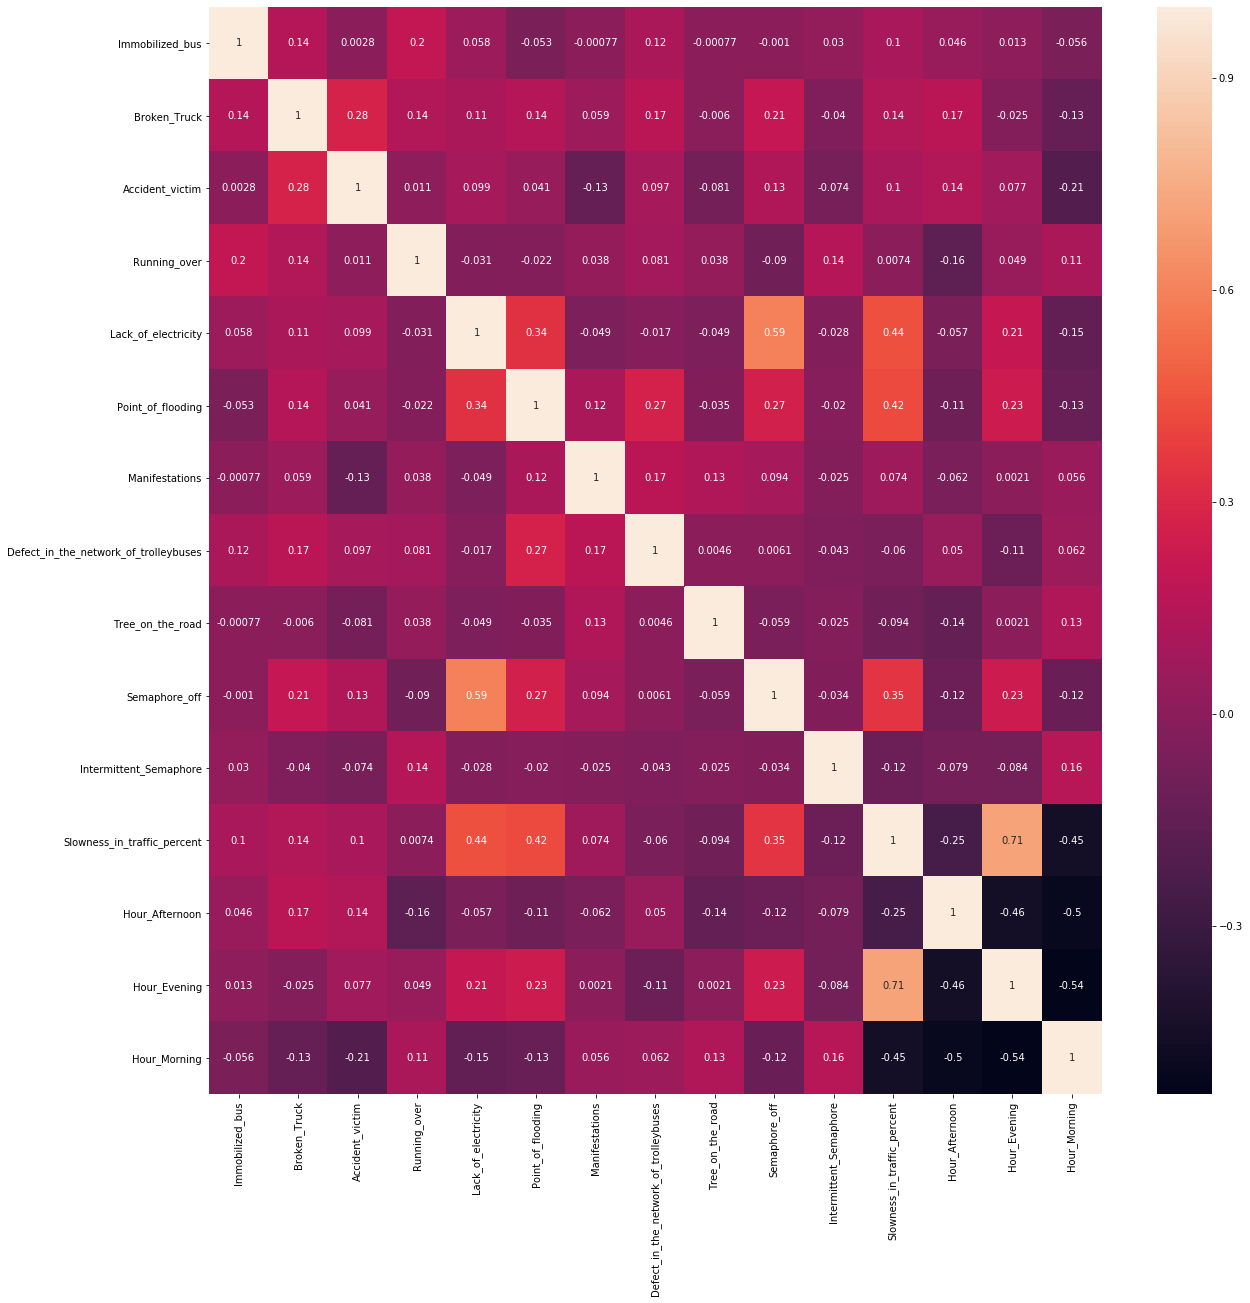

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True)

In [38]:
df.corr()

,Immobilized_bus,Broken_Truck,Accident_victim,Running_over,Lack_of_electricity,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent,Hour_Afternoon,Hour_Evening,Hour_Morning
Immobilized_bus,1.000000,0.144834,0.002833,0.197542,0.058432,-0.053061,-0.000775,0.116383,-0.000775,-0.001022,0.030409,0.101221,0.045534,0.013027,-0.055849
Broken_Truck,0.144834,1.000000,0.276806,0.139009,0.108358,0.142436,0.058686,0.165291,-0.006007,0.205482,-0.040223,0.135241,0.167266,-0.024509,-0.134812
Accident_victim,0.002833,0.276806,1.000000,0.010688,0.098703,0.041441,-0.130183,0.097017,-0.081189,0.129910,-0.074064,0.101105,0.138583,0.076658,-0.205950
Running_over,0.197542,0.139009,0.010688,1.000000,-0.031144,-0.022050,0.037986,0.081277,0.037986,-0.090220,0.142631,0.007447,-0.164526,0.049139,0.108271
Lack_of_electricity,0.058432,0.108358,0.098703,-0.031144,1.000000,0.335055,-0.048949,-0.017077,-0.048949,0.594758,-0.027848,0.435968,-0.056789,0.207555,-0.147900
Point_of_flooding,-0.053061,0.142436,0.041441,-0.022050,0.335055,1.000000,0.116964,0.270012,-0.034656,0.265481,-0.019717,0.418673,-0.107218,0.234121,-0.125897
Manifestations,-0.000775,0.058686,-0.130183,0.037986,-0.048949,0.116964,1.000000,0.166620,0.129353,0.094094,-0.025474,0.073805,-0.061568,0.002145,0.056306
Defect_in_the_network_of_trolleybuses,0.116383,0.165291,0.097017,0.081277,-0.017077,0.270012,0.166620,1.000000,0.004628,0.006107,-0.043447,-0.060071,0.050116,-0.112761,0.062081
Tree_on_the_road,-0.000775,-0.006007,-0.081189,0.037986,-0.048949,-0.034656,0.129353,0.004628,1.000000,-0.059082,-0.025474,-0.094013,-0.138527,0.002145,0.129295
Semaphore_off,-0.001022,0.205482,0.129910,-0.090220,0.594758,0.265481,0.094094,0.006107,-0.059082,1.000000,-0.033613,0.348348,-0.115088,0.234008,-0.118323


<b>Note:</b> From correlation analysis we can analyze and remove a few features which are not contributing much to the
    solution <br>
    
As we see "Running_over" and "Manifestations" can be removed.
    
Similary, <br>
"Lack_of_electricity" and <br>
"Semaphore_off" <br> 
are positively correlated.We can drop one of them.

In [39]:
df = df.drop(['Running_over'],axis=1)
df = df.drop(['Manifestations'],axis=1)
df = df.drop(['Lack_of_electricity'],axis=1)

In [40]:
df.columns

Index(['Immobilized_bus', 'Broken_Truck', 'Accident_victim',
       'Point_of_flooding', 'Defect_in_the_network_of_trolleybuses',
       'Tree_on_the_road', 'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Hour_Afternoon', 'Hour_Evening',
       'Hour_Morning'],
      dtype='object')

### Training the model:

a.First let's separate the Independent and Dependent variables <br>
b.Then Split the data to Train and Test sets<br>
c.Fit different models<br>
d.View results and preformance metrics<br>
e.Understand the feature importance<br>
f.Eliminated features using RFE technique<br>
g.Estimate performance post RFE<br>

In [41]:
x=df.drop(['Slowness_in_traffic_percent'],axis=1)
y= df['Slowness_in_traffic_percent']
x_train,x_test, y_train, y_test =  train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100)

In [42]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

98 42 98 42


In [43]:
import statsmodels.api as sm
# Linear regression model
log_model1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
log_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                      
=======================================================================================
Dep. Variable:     Slowness_in_traffic_percent   No. Observations:                   98
Model:                                     GLM   Df Residuals:                       87
Model Family:                         Binomial   Df Model:                           10
Link Function:                           logit   Scale:                          1.0000
Method:                                   IRLS   Log-Likelihood:                    nan
Date:                         Mon, 16 Dec 2019   Deviance:                          inf
Time:                                 15:59:15   Pearson chi2:                 3.11e+17
No. Iterations:                              2                                         
Covariance Type:                     nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                 -1.839e+15   7.07e+06   -2.6e+08      0.000   -1.84e+15   -1.84e+15
Immobilized_bus                        5.158e+14   6.81e+06   7.57e+07      0.000    5.16e+14    5.16e+14
Broken_Truck                           -2.47e+14   7.73e+06   -3.2e+07      0.000   -2.47e+14   -2.47e+14
Accident_victim                        9.514e+14   8.24e+06   1.15e+08      0.000    9.51e+14    9.51e+14
Point_of_flooding                      2.837e+15   1.51e+07   1.88e+08      0.000    2.84e+15    2.84e+15
Defect_in_the_network_of_trolleybuses -1.282e+15    9.8e+06  -1.31e+08      0.000   -1.28e+15   -1.28e+15
Tree_on_the_road                        6.01e+13   7.12e+06   8.44e+06      0.000    6.01e+13    6.01e+13
Semaphore_off                          2.465e+14   1.08e+07   2.28e+07      0.000    2.47e+14    2.47e+14
Intermittent_Semaphore                -4.859e+14   5.82e+06  -8.34e+07      0.000   -4.86e+14   -4.86e+14
Hour_Afternoon                        -5.515e+14   4.81e+06  -1.15e+08      0.000   -5.51e+14   -5.51e+14
Hour_Evening                           1.075e+15   4.91e+06   2.19e+08      0.000    1.07e+15    1.07e+15
Hour_Morning                          -5.217e+14   4.73e+06   -1.1e+08      0.000   -5.22e+14   -5.22e+14
=========================================================================================================
"""

In [44]:
# Function to calculate and print mean square error

def printError(y_test,y_pred,ModelName):
    print('RMSE ',ModelName,': ',np.sqrt(((y_pred - y_test) ** 2).mean()) )
    print('MAE ',ModelName,': ',mae(y_test,y_pred) )
    error = abs(y_pred-y_test)
    print('Median Abs Error: ',round(np.mean(error),2 ))

Starting with a Decision tree regressor followed by Random Forest and Linear Regressor models

In [45]:
#Training a DecisionTreeRegressor model

from sklearn.tree import DecisionTreeRegressor  
DTRegressor =  DecisionTreeRegressor()
DTRegressor.fit(x_train, y_train)
y_pred_DT = DTRegressor.predict(x_test)
printError(y_test,y_pred_DT,"DTRegressor")

RMSE  DTRegressor :  0.9385079651945843
MAE  DTRegressor :  0.676864513576328
Median Abs Error:  0.68


In [46]:
# Training a RandomForestRegressor model

from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rfRegressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rfRegressor.fit(x_train, y_train)
y_predRf = rfRegressor.predict(x_test)
printError(y_test,y_predRf,"rfRegressor")

RMSE  rfRegressor :  0.790973232922421
MAE  rfRegressor :  0.595485327281661
Median Abs Error:  0.6


In [47]:
#Trainging a Linear Regression
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_predLinReg = linReg.predict(x_test)
printError(y_test,y_predLinReg,"linReg")

RMSE  linReg :  0.7179180184741211
MAE  linReg :  0.5270041380307872
Median Abs Error:  0.53


In [48]:
#Viewing the regression coefficients and intercept of the regression equation
#To retrieve the intercept:

print("linReg.intercept_" ,linReg.intercept_)
#For retrieving the slope:
print("linReg.coef_", linReg.coef_)

linReg.intercept_ -0.047647172094327936
linReg.coef_ [ 0.09369629  0.07511563 -0.06253916  0.37416388  0.0070825  -0.03890058
  0.09071457 -0.04287519 -0.14224763  0.40291586 -0.25675586]


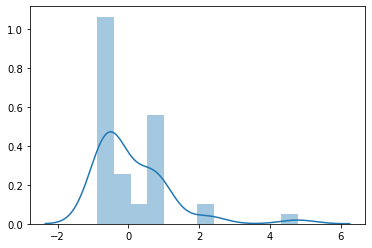

In [49]:
#Viewing how the predictions are distributed from a linear regression model
sns.distplot((y_predLinReg),bins=12)

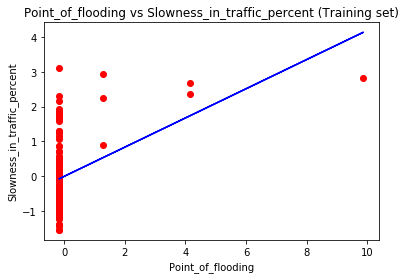

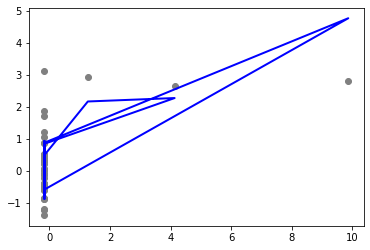

In [50]:
# Visualising the Training set results

x_plot = df['Point_of_flooding'].fillna(0).values.reshape(-1,1)
y_plot = df['Slowness_in_traffic_percent'].fillna(0).values.reshape(-1,1)

linReg1 = LinearRegression()
linReg1.fit(x_plot, y_plot)

linReg1.predict(x_plot)
plt.scatter(x_plot, y_plot, color = 'red')
plt.plot(x_plot, linReg1.predict(x_plot), color = 'blue')
plt.title('Point_of_flooding vs Slowness_in_traffic_percent (Training set)')
plt.xlabel('Point_of_flooding')
plt.ylabel('Slowness_in_traffic_percent')
plt.show()

plt.scatter(x_test['Point_of_flooding'], y_test,  color='gray')
plt.plot(x_test['Point_of_flooding'], y_predLinReg, color='blue', linewidth=2)
plt.show()

### Ridge regression
This addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.

https://scikit-learn.org/stable/modules/linear_model.html

In [51]:
from sklearn import linear_model
linModel = linear_model.Ridge(alpha=.009)
linModel.fit(x_train, y_train)
y_predLinModel = linModel.predict(x_test)
printError(y_test,y_predLinModel,"linModel")


RMSE  linModel :  0.7178264445910139
MAE  linModel :  0.5269822496703349
Median Abs Error:  0.53


### Lasso
This is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent.

https://scikit-learn.org/stable/modules/linear_model.html

In [52]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.042)
lasso.fit(x_train, y_train)
y_predLasso = lasso.predict(x_test)
printError(y_test,y_predLasso,"lasso")


RMSE  lasso :  0.691256527420139
MAE  lasso :  0.517721426921206
Median Abs Error:  0.52


<b>Note</b>: Fine tuned alpha value to give the best results or minimum suared error

### Feature Importance - Model based - Lasso

In [53]:
coef = pd.Series(lasso.coef_, index = x.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

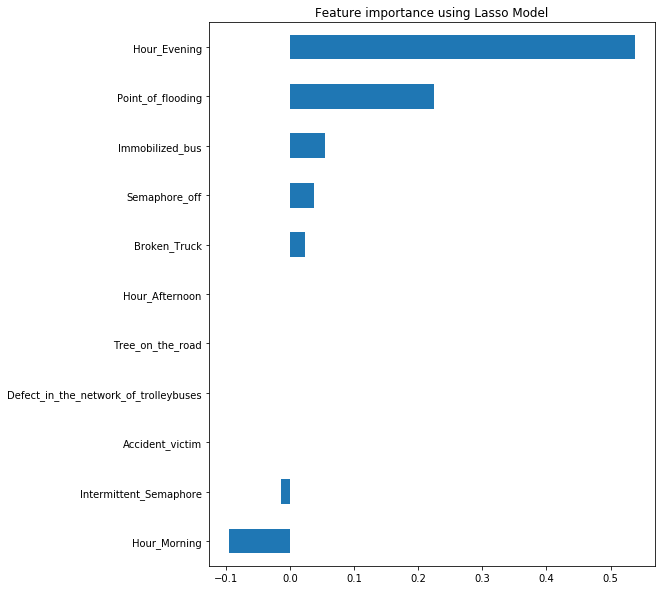

In [54]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

<b>Note:</b>   
From Lasso regressor's feature importance method we infer that the features that are contributing for 
slowness in traffic almost matches our inference from visualization.<br>

They are,<br>

a)Hour_Evening <br>
b)Point_of_flooding<br>
c)Immobilized_bus<br>
d)Semaphore_off<br>
e)Broken_truck<br>

### Feature Importance - Based on Random Forest Regressor

No handles with labels found to put in legend.


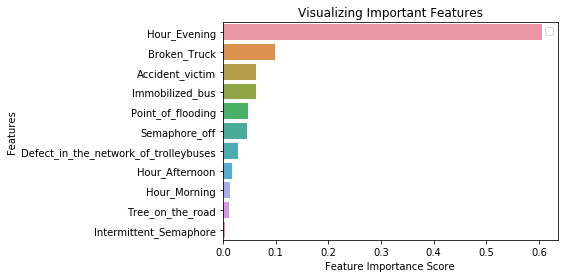

In [55]:
featImportance = sorted(zip(map(lambda x: round(x, 4), rfRegressor.feature_importances_), x_train.columns), reverse=True)
vals =[]
labels = []
for row in featImportance:
    vals.append(row[0])
    labels.append(row[1])
    
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=vals, y=labels)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [56]:
featImportance

[(0.6047, 'Hour_Evening'),
 (0.0986, 'Broken_Truck'),
 (0.0636, 'Accident_victim'),
 (0.063, 'Immobilized_bus'),
 (0.0471, 'Point_of_flooding'),
 (0.0466, 'Semaphore_off'),
 (0.0296, 'Defect_in_the_network_of_trolleybuses'),
 (0.0166, 'Hour_Afternoon'),
 (0.0142, 'Hour_Morning'),
 (0.0122, 'Tree_on_the_road'),
 (0.0038, 'Intermittent_Semaphore')]

<b>Note:</b>   
From RandomForest regressor's feature importance method we infer that the features that are contributing for 
slowness in traffic matches our inference from visualization.<br>

They are,<br>


a)Hour_Evening <br>
b)Broken_truck<br>
c)Accident_victim<br>
d)Immobilized_bus<br>
e)Point_of_flooding<br>
f)Semaphore_off<br>

In [57]:
#Selecting only those features that are important or relevant

rf_cols = ['Hour_Evening','Immobilized_bus', 'Broken_Truck',
           'Accident_victim','Semaphore_off','Point_of_flooding',
           'Defect_in_the_network_of_trolleybuses', 
           'Hour_Morning', 'Hour_Afternoon', 'Intermittent_Semaphore',]

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rfRegressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rfRegressor.fit(x_train[rf_cols], y_train)
y_predRf = rfRegressor.predict(x_test[rf_cols])
printError(y_test,y_predRf,"FeatureImportance_rfRegressor")

RMSE  FeatureImportance_rfRegressor :  0.7755611615011182
MAE  FeatureImportance_rfRegressor :  0.5939832862638871
Median Abs Error:  0.59


### Feature Selection Using RFE (Recursive Feature Elimination)

Out of the 12 left out features we try removing each feature recommended by the RFE alogrithm
and see how the performance is imporoving.<br>

For understanding we can try removing the least significant 4 features.<br>
In the next step we run the model excluding these 4(least significant) features and validate the
performance.<br>
    

In [58]:
colList = (df.columns.tolist())
#colList.remove("Slowness_in_traffic_percent_Scaled")
colList.remove("Slowness_in_traffic_percent")

In [59]:
#We programatically eliminate features starting with 11 till 7 features are left 
# and evaluate the performace of the linear regression model after each step

linRegRFE = LinearRegression()

for k in range (len(colList),6,-1):
    #print("Step k= ",k)
    rfe = RFE(linRegRFE, k)        # running RFE with k variables as output
    rfe = rfe.fit(x_train,y_train)
    #print("With ",k," feature out of 19 features",rfe.support_) # Printing the boolean results
    #print(rfe.ranking_)           # Printing the ranking
    colToRemove =[]
    print('Columns to remove.........:')
    for i in range(len(colList)-1):
        if(not rfe.support_[i]):
            print(df.columns[i])
            colToRemove.append(df.columns[i])
    RFE_cols = list (set(colList)-set(colToRemove))

    print('--------------------------')
    linRegRFE.fit(x_train[RFE_cols], y_train)
    y_predRFE = linRegRFE.predict(x_test[RFE_cols])
    printError(y_test,y_predRFE,"RFE_Tuning-linRegRFE")
    print('============================\n')    

Columns to remove.........:
--------------------------
RMSE  RFE_Tuning-linRegRFE :  0.717918018474121
MAE  RFE_Tuning-linRegRFE :  0.5270041380307872
Median Abs Error:  0.53

Columns to remove.........:
Defect_in_the_network_of_trolleybuses
--------------------------
RMSE  RFE_Tuning-linRegRFE :  0.7138434625512824
MAE  RFE_Tuning-linRegRFE :  0.5246016279820791
Median Abs Error:  0.52

Columns to remove.........:
Defect_in_the_network_of_trolleybuses
Tree_on_the_road
--------------------------
RMSE  RFE_Tuning-linRegRFE :  0.7214597536253063
MAE  RFE_Tuning-linRegRFE :  0.5348687607599076
Median Abs Error:  0.53

Columns to remove.........:
Defect_in_the_network_of_trolleybuses
Tree_on_the_road
Intermittent_Semaphore
--------------------------
RMSE  RFE_Tuning-linRegRFE :  0.7232264474303745
MAE  RFE_Tuning-linRegRFE :  0.5355914775470423
Median Abs Error:  0.54

Columns to remove.........:
Accident_victim
Defect_in_the_network_of_trolleybuses
Tree_on_the_road
Intermittent_Semaphore


<b>Note</b> Listed below are the features that are mainly contributing for Slowness in Traffic as selected by the model
post recursive elimination of least significant features.

In [65]:
#Printing columns that are selected post recurresive elimination
for i in range  (len(colList)):
    if rfe.ranking_[i] ==1:
        print(colList[i])

Immobilized_bus
Broken_Truck
Point_of_flooding
Semaphore_off
Hour_Afternoon
Hour_Evening
Hour_Morning


Here we see that the features further came down to 7 from 11 after removing the least significant features.<br>

Even the squared error has come down as we see in the last iteration.

In [61]:
# Evaluate how DecisionTreeRegressor performs on 
# the column list arrived at after RFE

from sklearn.tree import DecisionTreeRegressor  
DTRegressor =  DecisionTreeRegressor()
DTRegressor.fit(x_train[RFE_cols], y_train)
y_pred_DT = DTRegressor.predict(x_test[RFE_cols])
printError(y_test,y_pred_DT,"DTRegressor_RFE")
print('++++++++++++++++++++++++++++')

# Evaluate how RandomForestRegressor performs on 
# the column list arrived at after RFE

# Instantiate model with 1000 decision trees
rfRegressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rfRegressor.fit(x_train[RFE_cols], y_train)
y_predRf = rfRegressor.predict(x_test[RFE_cols])
printError(y_test,y_predRf,"RandomForest_RFE")
print('++++++++++++++++++++++++++++')

# Evaluate how linModel performs on 
# the column list arrived at after RFE

linRidge = linear_model.Ridge(alpha=.7)
linRidge.fit(x_train[RFE_cols], y_train)
y_predlinRidge = linRidge.predict(x_test[RFE_cols])
printError(y_test,y_predlinRidge,"linRidge")
print('++++++++++++++++++++++++++++')

# Evaluate how Lasso performs on 
# the column list arrived at after RFE

linLasso = linear_model.Lasso(alpha=0.07)
linLasso.fit(x_train[RFE_cols], y_train)
y_predlinLasso = linLasso.predict(x_test[RFE_cols])
printError(y_test,y_predlinLasso,"linLasso")

RMSE  DTRegressor_RFE :  0.829564561076912
MAE  DTRegressor_RFE :  0.6541919802233973
Median Abs Error:  0.65
++++++++++++++++++++++++++++
RMSE  RandomForest_RFE :  0.7374102911805451
MAE  RandomForest_RFE :  0.5992707417129916
Median Abs Error:  0.6
++++++++++++++++++++++++++++
RMSE  linRidge :  0.7092531050360185
MAE  linRidge :  0.521748542598207
Median Abs Error:  0.52
++++++++++++++++++++++++++++
RMSE  linLasso :  0.7562499819636145
MAE  linLasso :  0.5612707909841822
Median Abs Error:  0.56


<b>Note:</b> 
We ran the models again with the final set of features after using the RFE technique and 
observed that the root mean square error reduced to its best with Linear Regression(Ridge) variant.